# Simulation of COVID pandemic on bilayer network


In [1]:
%load_ext autoreload
%autoreload 2

from scripts.network import create_bilayer_network
from scripts.epidemic_layer import initialize_epidemic
from scripts.virtual_layer import initialize_virtual

import networkx as nx

import scripts.visualization as viz

viz.load_matplotlib()
plt = viz.plt

N_AGENTS = 100
N_ADDITIONAL_VIRTUAL_LINKS = 300
INIT_INFECTED_FRACTION = 0.2
INIT_AWARE_FRACTION = 0.3

l1_layer, l2_layer = create_bilayer_network(N_AGENTS, N_ADDITIONAL_VIRTUAL_LINKS)

In [2]:
l1_layer_init = initialize_epidemic(l1_layer, INIT_INFECTED_FRACTION)
l2_layer_init = initialize_virtual(l2_layer, INIT_AWARE_FRACTION)

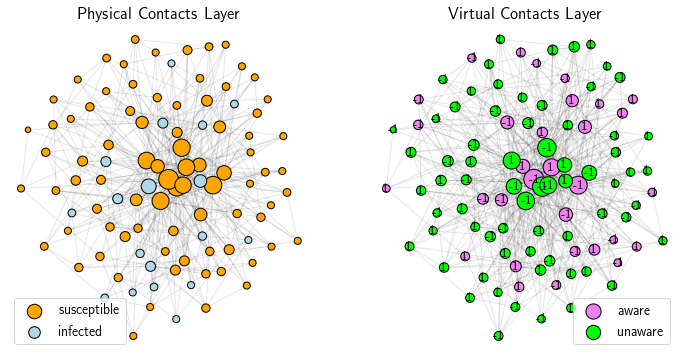

In [3]:
pos = nx.spring_layout(l1_layer, k=0.05, iterations=200)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

viz.draw_epidemic_layer(l1_layer_init, pos=pos, ax=axs[0], node_border_width=1.0)
axs[0].set_axis_off()
axs[0].set_title('Physical Contacts Layer')
axs[0].legend()

viz.draw_virtual_layer(l2_layer_init, pos=pos, ax=axs[1], node_border_width=1.0)
axs[1].set_title('Virtual Contacts Layer')
axs[1].set_axis_off()
axs[1].legend()

# viz.save_figure("../plots/initial_network_state.png")
plt.show()

In [4]:
# TODO - simple l1 and l2 layer simulations ... 


In [11]:
from scripts.age_statistics import generate_from_age_gender_distribution

males = generate_from_age_gender_distribution(int(16e6), 'M')
females = generate_from_age_gender_distribution(int(16e6), 'F')

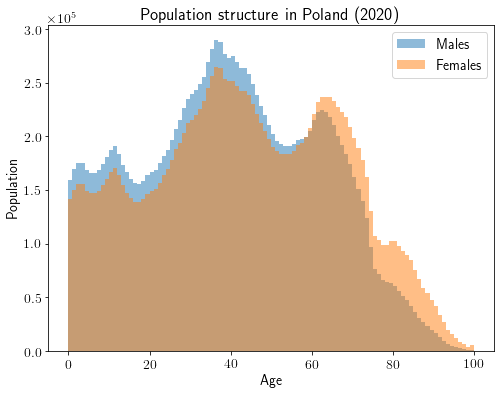

In [14]:
from matplotlib import ticker

fig, ax = plt.subplots()
ax.hist(males, bins=100, alpha=0.5, label='Males')
ax.hist(females, bins=100, alpha=0.5, label='Females')
ax.set_xlabel('Age')
ax.set_ylabel('Population')
ax.set_title('Population structure in Poland (2020)')
yfmt = ticker.ScalarFormatter(useMathText=True)
yfmt.set_powerlimits((3, 4))
ax.yaxis.set_major_formatter(yfmt)
ax.legend()
plt.show()


In [66]:
from scripts.simulation import init_run_simulation
from scripts.parameters import *
from scripts.epidemic_metrics import *
from scripts.virtual_metrics import *

l1_params = PhysicalLayerParameters(0.2, 0.4, 0.2)
l2_params = VirtualLayerParameters(0.1, 0.2)
l2_voter_params = QVoterParameters(3, 0.7, 0.3)
l2_social_media_params = SocialMediaParameters(0.1, 10)

metrics = {'aware_ratio': ('l2_layer', aware_ratio),
           'unaware_ratio': ('l2_layer', unaware_ratio),
           'infected_ratio': ('l1_layer', infected_ratio),
           'dead_ratio': ('l1_layer', dead_ratio),
           'quarantined_ratio': ('l1_layer', quarantined_ratio),
           'recovered_ratio': ('l1_layer', recovered_ratio),
           'susceptible_ratio': ('l1_layer', susceptible_ratio),
           'mean_opinion': ('l2_layer', mean_opinion)}

N_AGENTS = 300
N_ADDITIONAL_VIRTUAL_LINKS = 1000
INIT_INFECTED_FRACTION = 0.1
INIT_AWARE_FRACTION = 0.01

output_metrics, l1_new, l2_new = init_run_simulation(
    N_AGENTS,
    N_ADDITIONAL_VIRTUAL_LINKS,
    INIT_INFECTED_FRACTION,
    INIT_AWARE_FRACTION,
    10000,
    l1_params,
    l2_params,
    l2_voter_params,
    l2_social_media_params,
    metrics,
    verbose=True)

Step: 0 / 10000
Step: 1000 / 10000
Step: 2000 / 10000
Step: 3000 / 10000
Step: 4000 / 10000
Step: 5000 / 10000
Step: 6000 / 10000
Step: 7000 / 10000
Step: 8000 / 10000
Step: 9000 / 10000


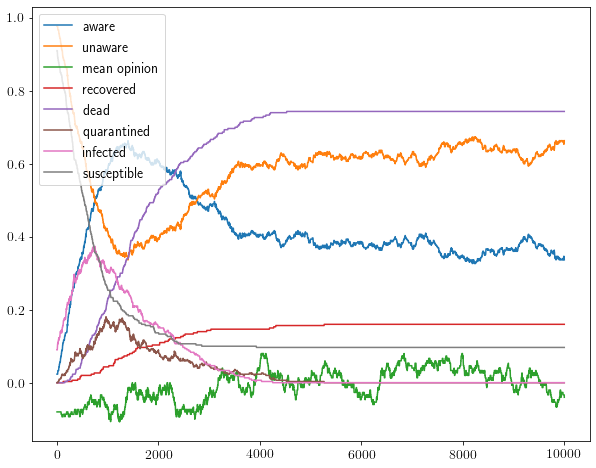

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(output_metrics['aware_ratio'], label='aware')
plt.plot(output_metrics['unaware_ratio'], label='unaware')
plt.plot(output_metrics['mean_opinion'], label='mean opinion')
plt.plot(output_metrics['recovered_ratio'], label='recovered')
plt.plot(output_metrics['dead_ratio'], label='dead')
plt.plot(output_metrics['quarantined_ratio'], label='quarantined')
plt.plot(output_metrics['infected_ratio'], label='infected')
plt.plot(output_metrics['susceptible_ratio'], label='susceptible')
plt.legend()
plt.show()

In [68]:
pos = nx.spring_layout(l1_new, k=0.05, iterations=200)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

viz.draw_epidemic_layer(l1_new, pos=pos, ax=axs[0], node_border_width=1.0)
axs[0].set_axis_off()
axs[0].set_title('Physical Contacts Layer')
axs[0].legend()

viz.draw_virtual_layer(l2_new, pos=pos, ax=axs[1], node_border_width=1.0)
axs[1].set_title('Virtual Contacts Layer')
axs[1].set_axis_off()
axs[1].legend()

plt.show()